<a href="https://colab.research.google.com/github/Raunakaga2004/HOML-practice/blob/main/HOML_ch2_practice1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get the data


In [ ]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Observations :** <br>
Every column is numerical except 'ocean_proximity'.

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Observations :**<br>
'total_bedrooms' have null values.

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Observations :**  <br>Scale of all features are different as std is different for every feature.  
total_rooms, total_bedrooms, population, households, median_income, median_house_value might be right skewed as median lies before mean.

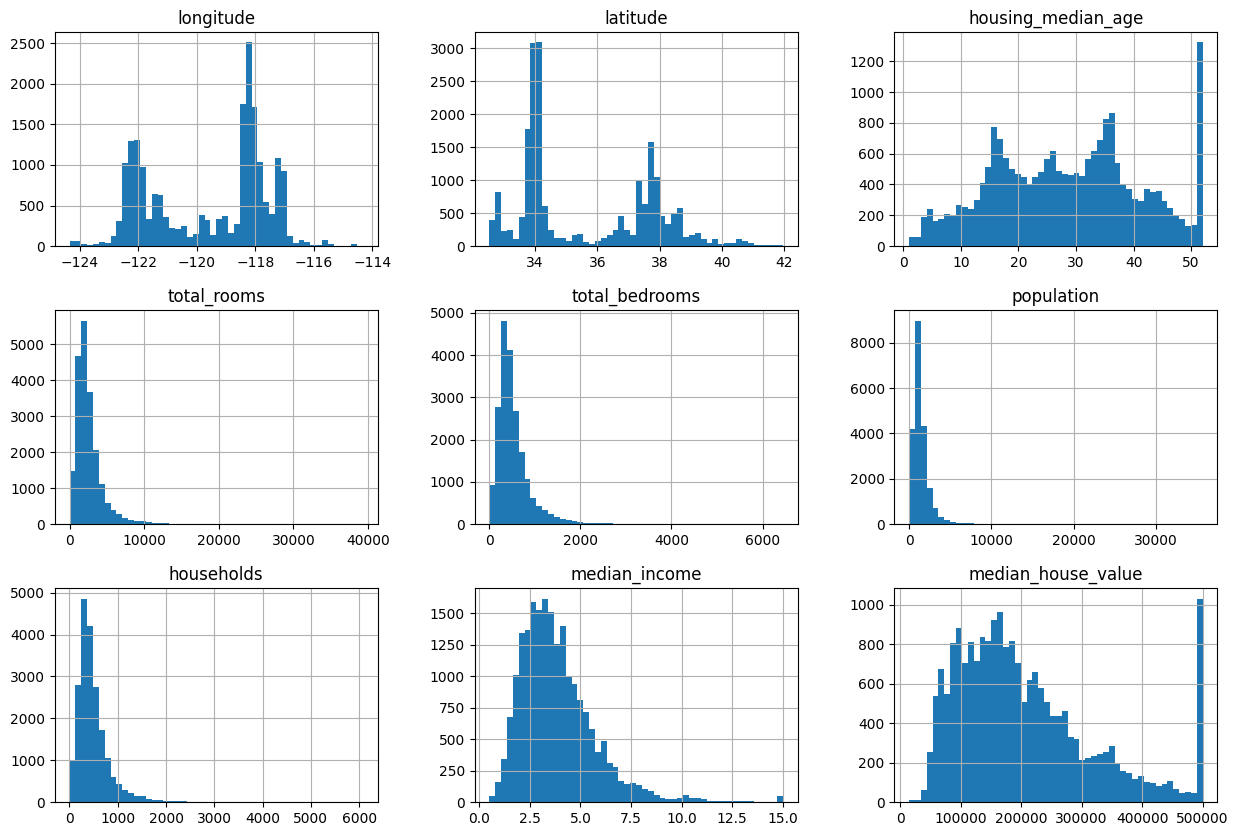

In [ ]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(15,10))
plt.show()

**Observations :**<br>
Looks like housing_median_age, median_income and median_housing_value are capped.<br>
And many histograms are skewed right as we can see.



# Creating a test case

### using custom shuffle split

In [ ]:
import numpy as np;

def shuffle_and_split_data(data, test_ratio, seed = 42) :

  np.random.seed(seed); # set the seed, default is 42

  # Shuffle the indices of rows in data
  shuffled_indices = np.random.permutation(np.array(data.index)) # np.random.permutations shuffles the array elements

  # Number of rows as test case on the basis of test_ratio
  test_rows = int(len(data) * test_ratio) #len(data) means number of rows in data

  # Get the test_rows amount of top shuffled indices rows
  test_indices = shuffled_indices[:test_rows];

  # Get the train data rows
  train_indices = shuffled_indices[test_rows:];

  # return train and test data
  return data.iloc[train_indices], data.iloc[test_indices];


In [ ]:
train_temp, test_temp =  shuffle_and_split_data(housing, 0.2)

### using train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

train, test= train_test_split(housing, test_size = 0.2, random_state=42)

### using StratifiedShuffleSplit

In [ ]:
import numpy as np

<Axes: xlabel='median_income'>

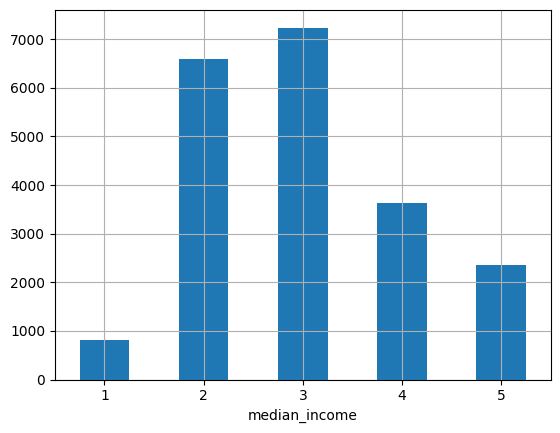

In [ ]:
income_cat = pd.cut(housing["median_income"], bins=[0,1.5,3,4.5,6,np.inf], labels=[1,2,3,4,5])

income_cat.value_counts().sort_index().plot.bar(rot=0, grid=True)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42);
strats_split = []
for train_index, test_index in splitter.split(housing, income_cat) :
  strats_split.append([housing.iloc[train_index], housing.iloc[test_index]])

### using stratified sampling by train_test_split

In [ ]:
strat_train, strat_test = train_test_split(housing, test_size = 0.2, stratify=income_cat, random_state=42)

# Explore and Visualize Data to Gain Insights

In [ ]:
# making a copy of training set
h_train = strat_train.copy();

### Visualizing Geographical data

<Axes: xlabel='longitude', ylabel='latitude'>

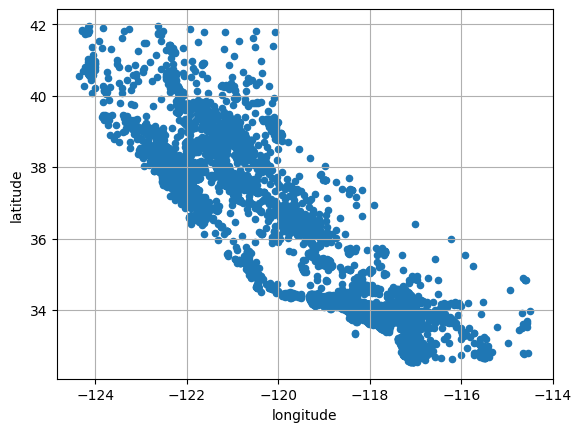

In [ ]:
h_train.plot(kind="scatter", x = "longitude", y = "latitude", grid=True)

<Axes: xlabel='longitude', ylabel='latitude'>

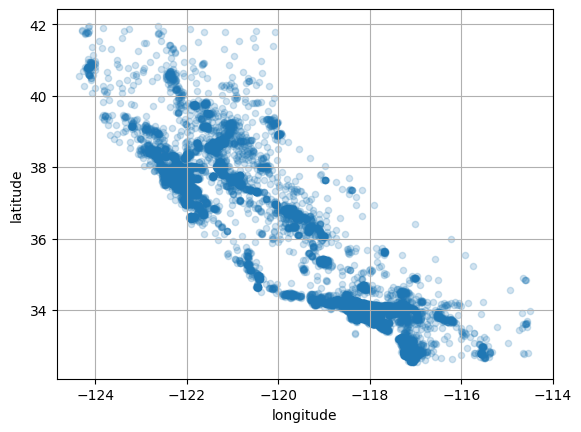

In [ ]:
h_train.plot(kind="scatter", x = "longitude", y = "latitude", grid=True, alpha = 0.2)

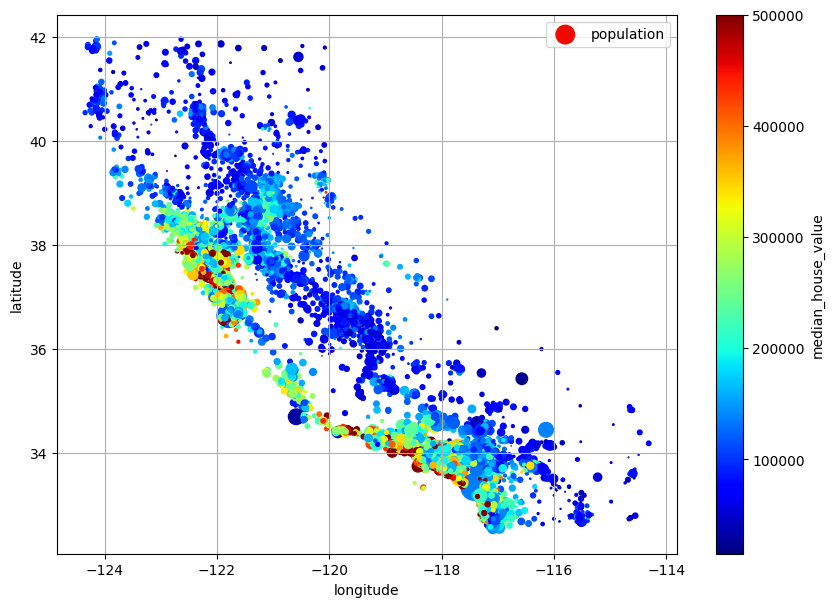

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
# save_fig("housing_prices_scatterplot")  # extra code
plt.show()

**Observation :** <br>
Prices of ocean side houses are higher as compare to other houses

### Looking for correlations

In [ ]:
corr_matrix = h_train.iloc[:,: -1].corr() # excluding last column as it has non numerical data
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


In [ ]:
corr_matrix.median_house_value.sort_values(ascending = False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
longitude,-0.050859
latitude,-0.139584


**Observation :** <br>
median_income has high positve correlation with median_house_value

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

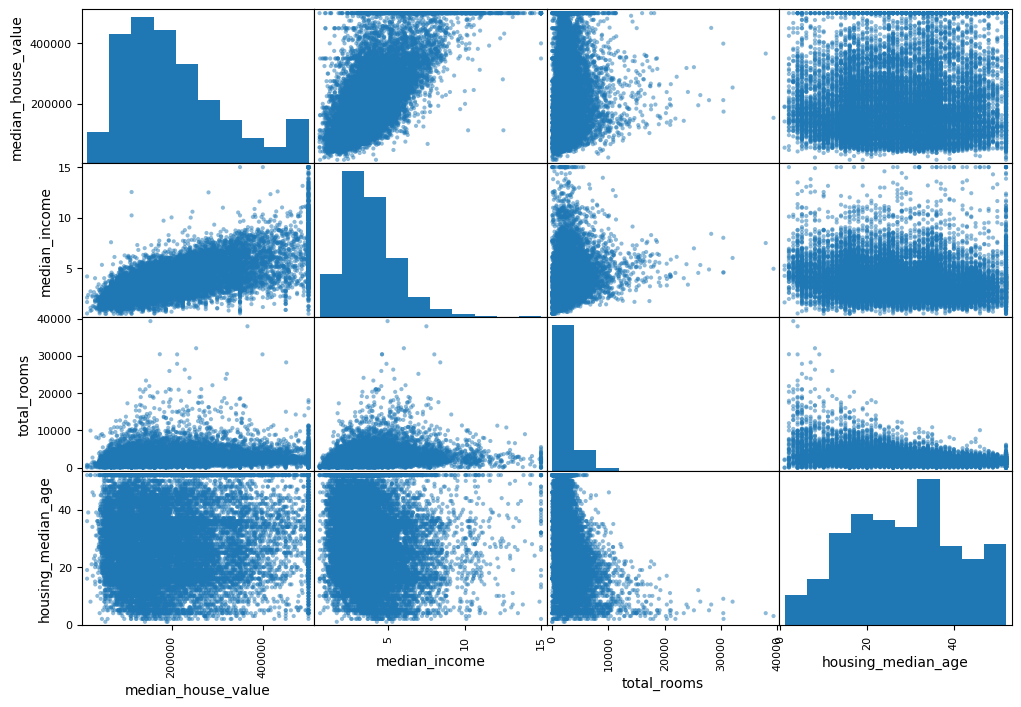

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"];
scatter_matrix(h_train[attributes], figsize=(12,8))

**Observation :** <br>
We can see the capped value<br>
And also here we can see median_house_value and median_income has linear relationship

### Experiment with attribute combinations

In [ ]:
# as we can see households, total_rooms, total_bedrooms, population are not contributing that much

h_train["rooms"] = h_train.total_rooms/ h_train.households
h_train["bedroomns_ratio"] = h_train.total_bedrooms / h_train.total_rooms

In [ ]:
# check correlation again
corr_matrix  = h_train.drop(columns=['ocean_proximity']).corr()["median_house_value"].sort_values(ascending = False);

In [ ]:
corr_matrix

,median_house_value
median_house_value,1.000000
median_income,0.688380
rooms,0.143663
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
longitude,-0.050859
latitude,-0.139584


**Observation :** <br>
if more bedrooms among total rooms has less price <br>
and more rooms per households has more price

# Data Preprocessing

In [ ]:
housing = strat_train.drop("median_house_value", axis = 1)
housing_label = strat_train.median_house_value

### Data Cleaning (handling missing values)

only total_bedrooms column has missing values

In [ ]:
# imputing by median values

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [ ]:
imputer.fit(housing.drop("ocean_proximity", axis =1))

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [ ]:
X = imputer.transform(housing.drop("ocean_proximity", axis = 1))

In [ ]:
housing_imputed = pd.DataFrame(X, columns=housing.drop("ocean_proximity", axis = 1).columns, index = housing.index )

### Handling Text and Categorical Attributes

We have only one categorical variable that is ocean_proximity

and using one hot encoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse_output = False, drop="first", dtype=np.int8)
housing_cat = cat_encoder.fit_transform(pd.DataFrame(housing.ocean_proximity))

In [ ]:
housing_cat

array([[0, 0, 1, 0],
       [0, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 1]], dtype=int8)

In [ ]:
cat_encoder.categories_[0][1:]

array(['INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)

In [ ]:
housing_cat = pd.DataFrame(housing_cat, columns = [cat_encoder.categories_[0][1:]])

In [ ]:
housing_cat

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,1,0
1,0,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,0,1
...,...,...,...,...
16507,0,0,0,0
16508,1,0,0,0
16509,0,0,0,1
16510,0,0,0,0


### Feature Scaling and Transformation

#### MinMax Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler =  MinMaxScaler(feature_range=(-1,1))
housing_min_max_scaled = min_max_scaler.fit_transform(housing.drop("ocean_proximity", axis=1))

In [ ]:
housing_min_max_scaled = pd.DataFrame(housing_min_max_scaled, columns=housing.drop("ocean_proximity", axis=1).columns )
housing_min_max_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-0.608519,0.117021,1.000000,-0.831171,-0.641166,-0.807018,-0.614336,-0.779479
1,0.210953,-0.661702,0.529412,-0.900148,-0.886294,-0.918660,-0.867090,-0.229293
2,-0.519270,0.236170,0.254902,-0.945012,-0.930424,-0.931419,-0.924585,-0.733369
3,0.468560,-0.744681,-0.372549,-0.787782,-0.726204,-0.774015,-0.709166,-0.756983
4,0.257606,-0.740426,0.372549,-0.778015,-0.610243,-0.765796,-0.562815,-0.582171
...,...,...,...,...,...,...,...,...
16507,0.206897,-0.721277,0.568627,-0.886312,-0.808021,-0.885290,-0.805115,-0.419236
16508,0.022312,-0.197872,-0.137255,-0.850298,-0.809631,-0.826279,-0.801755,-0.714018
16509,0.478702,-0.991489,-0.529412,-0.800702,-0.750684,-0.655134,-0.716632,-0.508738
16510,0.206897,-0.678723,0.411765,-0.807773,-0.719117,-0.788738,-0.687512,-0.497166


#### Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler =  StandardScaler()
housing_standard_scaled = standard_scaler.fit_transform(housing.drop("ocean_proximity", axis=1))

In [ ]:
housing_standard_scaled = pd.DataFrame(housing_standard_scaled, columns=housing.drop("ocean_proximity", axis=1).columns )
housing_standard_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.423037,1.013606,1.861119,0.311912,1.359094,0.137460,1.394812,-0.936491
1,0.596394,-0.702103,0.907630,-0.308620,-0.436356,-0.693771,-0.373485,1.171942
2,-1.203098,1.276119,0.351428,-0.712240,-0.759584,-0.788768,-0.775727,-0.759789
3,1.231216,-0.884924,-0.919891,0.702262,0.736231,0.383175,0.731375,-0.850281
4,0.711362,-0.875549,0.589800,0.790125,1.585590,0.444376,1.755263,-0.180365
...,...,...,...,...,...,...,...,...
16507,0.586397,-0.833359,0.987087,-0.184147,0.136961,-0.445315,0.060101,0.444041
16508,0.131525,0.319822,-0.443146,0.139847,0.125165,-0.005950,0.083608,-0.685630
16509,1.256209,-1.428701,-1.237721,0.586026,0.556922,1.268299,0.679135,0.101049
16510,0.586397,-0.739605,0.669257,0.522417,0.788136,0.273563,0.882868,0.145396


### Custom Transformers

In [ ]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

<ipython-input-104-d257c39d6915>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_pop)


<Axes: ylabel='Density'>

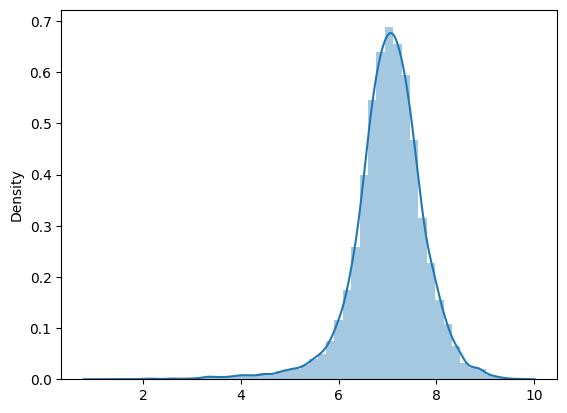

In [ ]:
import seaborn as sns
sns.distplot(log_pop)

<ipython-input-105-303ffa57d777>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing.population)


<Axes: xlabel='population', ylabel='Density'>

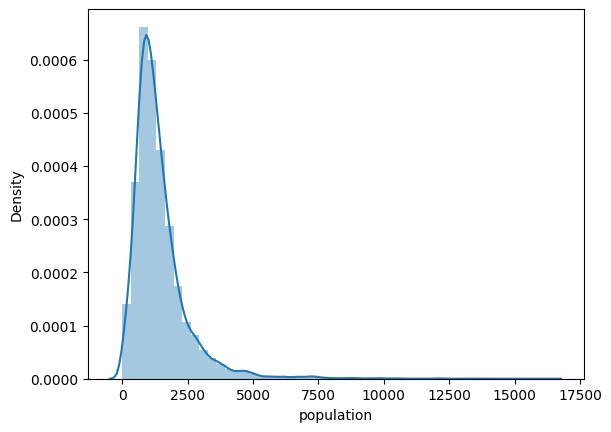

In [ ]:
sns.distplot(housing.population)

### Pipeline

In [ ]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy ="median")),
    ("standardize", StandardScaler())
])

# or

from sklearn.pipeline import make_pipeline

num_make_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [ ]:
housing_num = housing.drop("ocean_proximity", axis = 1)

In [ ]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)

In [ ]:
housing_num_prepared = pd.DataFrame(housing_num_prepared.round(2), columns = housing_num.columns)
housing_num_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.42,1.01,1.86,0.31,1.37,0.14,1.39,-0.94
1,0.60,-0.70,0.91,-0.31,-0.44,-0.69,-0.37,1.17
2,-1.20,1.28,0.35,-0.71,-0.76,-0.79,-0.78,-0.76
3,1.23,-0.88,-0.92,0.70,0.74,0.38,0.73,-0.85
4,0.71,-0.88,0.59,0.79,1.60,0.44,1.76,-0.18
...,...,...,...,...,...,...,...,...
16507,0.59,-0.83,0.99,-0.18,0.14,-0.45,0.06,0.44
16508,0.13,0.32,-0.44,0.14,0.13,-0.01,0.08,-0.69
16509,1.26,-1.43,-1.24,0.59,0.56,1.27,0.68,0.10
16510,0.59,-0.74,0.67,0.52,0.79,0.27,0.88,0.15


In [ ]:
cat_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy ="most_frequent")),
    ("ohc", OneHotEncoder(handle_unknown="ignore"))
])

In [ ]:
from sklearn.compose import make_column_transformer, make_column_selector

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include = object))
)

In [ ]:
housing_preprocessed = preprocessing.fit_transform(housing)

In [ ]:
housing_preprocessed

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.59639445, -0.702103  ,  0.90762971, ...,  0.        ,
         0.        ,  0.        ],
       [-1.2030985 ,  1.27611874,  0.35142777, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41803793,  0.94797769,  1.22545939, ...,  0.        ,
         0.        ,  1.        ]])

# Training Model

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_label)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e41b82cb590>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohc',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e41b7875c90>)])),
                ('linearregression', LinearRegression())])

In [ ]:
housing_predictions= lin_reg.predict(housing)
housing_predictions[:5].round(0)

array([270887., 334831., 119856., 109211., 305576.])

In [ ]:
housing_label[:5]

,median_house_value
13096,458300.0
14973,483800.0
3785,101700.0
14689,96100.0
20507,361800.0


In [ ]:
from sklearn.metrics import mean_squared_error

lin_rmse = np.sqrt(mean_squared_error(housing_label, housing_predictions, ))
lin_rmse

68232.83515124217

This model is clearly underfitting

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state = 42))
tree_reg.fit(housing, housing_label)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e41b82cb590>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohc',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e41b7875c90>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
tree_prediction = tree_reg.predict(housing)

In [ ]:
tree_rmse = np.sqrt(mean_squared_error(housing_label, tree_prediction, ))
tree_rmse

0.0

This model has badly overfit the data

To confirm we need to evaluate in more advance way with cross validation

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state = 42))

In [ ]:
forest_rmses = - cross_val_score(forest_reg, housing, housing_label, scoring="neg_root_mean_squared_error", cv =10)

In [ ]:
pd.Series(forest_rmses).describe()

,0
count,10.000000
mean,48920.517843
std,715.207292
min,47479.120613
25%,48492.372660
50%,49001.090516
75%,49386.763452
max,49998.347019


#### Evaluating the model on the basis of cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

tree_rmses = - cross_val_score(tree_reg, housing, housing_label, scoring="neg_root_mean_squared_error", cv =10)

In [ ]:
pd.Series(tree_rmses).describe()

,0
count,10.000000
mean,68778.541172
std,1606.882060
min,66941.100114
25%,67347.392808
50%,68653.791710
75%,69967.922873
max,71446.436634


In [ ]:
lin_rmses = - cross_val_score(lin_reg, housing, housing_label, scoring="neg_root_mean_squared_error", cv =10)

In [ ]:
pd.Series(lin_rmses).describe()

,0
count,10.000000
mean,68316.200932
std,1024.094868
min,67256.049270
25%,67453.023761
50%,68046.527908
75%,68959.982057
max,69952.430271


# Fine Tune the Model

best model we have currently is random forest

#### using grid search cv

In [ ]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("Preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state = 42))
])

In [ ]:
preprocessing.get_feature_names_out()

array(['pipeline-1__longitude', 'pipeline-1__latitude',
       'pipeline-1__housing_median_age', 'pipeline-1__total_rooms',
       'pipeline-1__total_bedrooms', 'pipeline-1__population',
       'pipeline-1__households', 'pipeline-1__median_income',
       'pipeline-2__ocean_proximity_<1H OCEAN',
       'pipeline-2__ocean_proximity_INLAND',
       'pipeline-2__ocean_proximity_ISLAND',
       'pipeline-2__ocean_proximity_NEAR BAY',
       'pipeline-2__ocean_proximity_NEAR OCEAN'], dtype=object)

In [ ]:
param_grid = {
    'max_features' : [4,6,8],
    'max_features' : [6,8,10]
}

In [ ]:
grid_search =  GridSearchCV(RandomForestRegressor(random_state = 42) , param_grid, cv=3, scoring = "neg_root_mean_squared_error")

In [ ]:
grid_search.fit(preprocessing.transform(housing), housing_label)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_features': [6, 8, 10]},
             scoring='neg_root_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 6}

In [ ]:
final_model =  grid_search.best_estimator_

### Evaluating on the basis of test set

In [ ]:
X_test = strat_test.drop("median_house_value", axis =1)
y_test = strat_test["median_house_value"].copy()

In [ ]:
final_predictions = final_model.predict(preprocessing.transform(X_test))

In [ ]:
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
final_rmse

49133.57691648763

In [ ]:
finalModel = make_pipeline([
    preprocessing, final_model
])

# Launch

In [ ]:
import joblib

In [ ]:
joblib.dump(finalModel, "my_california_model.pkl")

['my_california_model.pkl']